In [1]:
import cv2, os, glob
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from skimage.transform import pyramid_expand
from Subpixel import Subpixel
from DataGenerator import DataGenerator
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from keras.layers import *
from keras.regularizers import *
from keras.optimizers import *
from keras.models import *
from keras import backend as K
from keras.preprocessing import image

In [3]:
tf.keras.__version__

'2.2.4-tf'

# Fine Tuning을 위한 데이터 전처리 작업 npy 파일로 만드는 과정임

In [24]:
image_list = glob.glob("50\\*.jpg")
len(image_list)

1995

In [25]:
from PIL import Image
def resize(path):
    image = Image.open(path)
    resized_image = cv2.resize(np.array(image),dsize = (128,128) ,interpolation = cv2.INTER_AREA )
    resized_image  = resized_image.astype('float64')/255.
    return resized_image

In [26]:
img_1 = 128
img_2 = 128
img_3 = 3

print(len(image_list))

train =np.zeros((len(image_list),img_1,img_2,img_3))

for i,j in enumerate(image_list):
    train[i,:,:,:] = resize(j)

1995


In [28]:
train.shape

(1995, 128, 128, 3)

In [22]:
# for i,j in enumerate(train):
#     img = image.array_to_img(j)
#     img.save('50\\'+str(i)+'.jpg')

In [27]:
a = 0
for i in train:
    경로 = 'C:\\Users\\hyoun\\딥러닝\\화질개선데이터\\x_train1\\' + str(a) + '.npy'
    np.save(경로,i)
    a += 1

# 여기부터 실행

In [4]:
x_test_list = sorted(glob.glob("vae얼굴사진\\*.npy"))
len(x_test_list)

225

In [5]:
test_data = []
for i in x_test_list:
    test_data.append(np.load(i))
len(test_data)

225

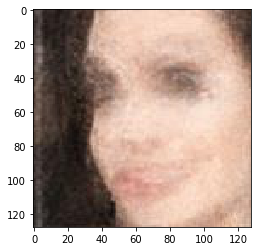

In [6]:
plt.imshow(test_data[197])

In [7]:
x_train_list = sorted(glob.glob("화질개선데이터\\x_train1\\*.npy"))
y_train_list = sorted(glob.glob("화질개선데이터\\y_train1\\*.npy"))
train_gen = DataGenerator(list_IDs=x_train_list, labels=None, batch_size=8, dim=(128,128), n_channels=3, n_classes=None, shuffle=True)
ytrain_gen = DataGenerator(list_IDs=y_train_list, labels=None, batch_size=8, dim=(128,128), n_channels=3, n_classes=None, shuffle=True)
print(len(x_train_list))
print(x_train_list[0])

1995
화질개선데이터\x_train1\0.npy


(128, 128, 3) (128, 128, 3)


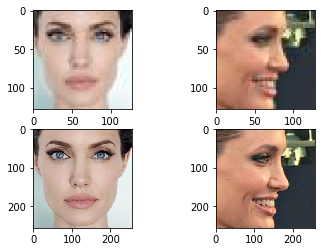

In [8]:
x1 = np.load(x_train_list[0])
x2 = np.load(x_train_list[1])
x3 = np.load(y_train_list[0])
x4 = np.load(y_train_list[1])
print(x1.shape, x2.shape)

plt.subplot(2, 2, 1)
plt.imshow(x1)
plt.subplot(2, 2, 2)
plt.imshow(x2)
plt.subplot(2, 2, 3)
plt.imshow(x3)
plt.subplot(2, 2, 4)
plt.imshow(x4)

In [9]:
upscale_factor = 2

inputs = Input(shape=(128,128,3),dtype='float32')

net = Conv2D(filters=256, kernel_size=5, strides=1, padding='same', activation='relu')(inputs)
net = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = Conv2D(filters=upscale_factor**2, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = Subpixel(filters=3, kernel_size=3, r=upscale_factor, padding='same')(net)
outputs = Activation('relu')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=RMSprop(lr = 0.0005), loss='mse')

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 256)     19456     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     295040    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 4)       1156      
_________________________________________________________________
subpixel_1 (Subpixel)        (None, 256, 256, 3)       444 

In [11]:
a = 1
name ='version2_' + str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=1)
model.save(name)
a += 1

Epoch 1/1
249/249 [==============================] - 60s 243ms/step - loss: 0.0596


(1, 256, 256, 3)


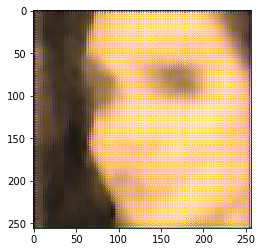

In [12]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [13]:
name = 'version2_' +str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=1)
model.save(name)
a += 1

Epoch 1/1
249/249 [==============================] - 59s 237ms/step - loss: 0.0150


(1, 256, 256, 3)


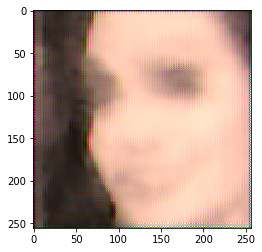

In [14]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [15]:
name = 'version2_' + str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=1)
model.save(name)
a += 1

Epoch 1/1
249/249 [==============================] - 60s 241ms/step - loss: 0.0115


(1, 256, 256, 3)


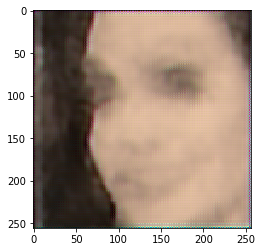

In [16]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [17]:
name = 'version2_' + str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=1)
model.save(name)
a += 1

Epoch 1/1
249/249 [==============================] - 60s 242ms/step - loss: 0.0092


(1, 256, 256, 3)


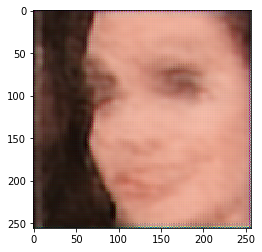

In [18]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [19]:
name ='version2_' + str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=1)
model.save(name)
a += 5

Epoch 1/1
249/249 [==============================] - 60s 242ms/step - loss: 0.0075


(1, 256, 256, 3)


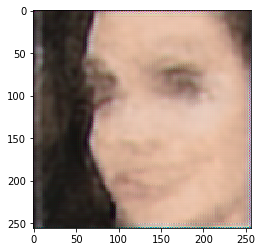

In [20]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [21]:
name ='version2_' +  str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=5)
model.save(name)
a += 10

Epoch 1/5
249/249 [==============================] - 61s 243ms/step - loss: 0.0064
Epoch 2/5
249/249 [==============================] - 61s 243ms/step - loss: 0.0057
Epoch 3/5
249/249 [==============================] - 61s 244ms/step - loss: 0.0053
Epoch 4/5
249/249 [==============================] - 61s 243ms/step - loss: 0.0048
Epoch 5/5
249/249 [==============================] - 61s 243ms/step - loss: 0.0046


(1, 256, 256, 3)


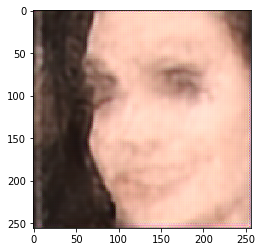

In [22]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [23]:
name = 'version2_' + str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=10)
model.save(name)
a += 10

Epoch 1/10
249/249 [==============================] - 61s 243ms/step - loss: 0.0042
Epoch 2/10
249/249 [==============================] - 61s 244ms/step - loss: 0.0040
Epoch 3/10
249/249 [==============================] - 61s 244ms/step - loss: 0.0039
Epoch 4/10
249/249 [==============================] - 61s 245ms/step - loss: 0.0037
Epoch 5/10
249/249 [==============================] - 61s 245ms/step - loss: 0.0036
Epoch 6/10
249/249 [==============================] - 61s 244ms/step - loss: 0.0035
Epoch 7/10
249/249 [==============================] - 61s 244ms/step - loss: 0.0035
Epoch 8/10
249/249 [==============================] - 62s 247ms/step - loss: 0.0034
Epoch 9/10
249/249 [==============================] - 61s 244ms/step - loss: 0.0033
Epoch 10/10
249/249 [==============================] - 61s 245ms/step - loss: 0.0033


(1, 256, 256, 3)


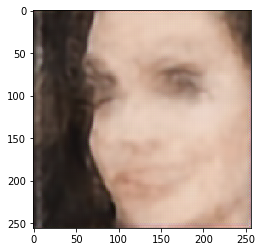

In [24]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


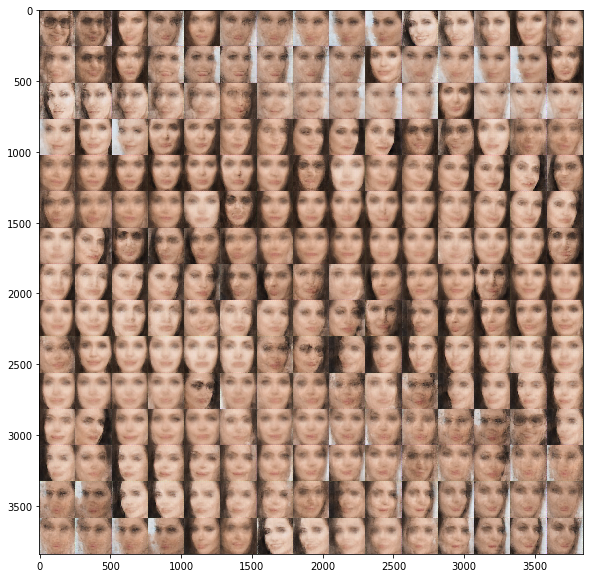

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 256
figure = np.zeros((digit_size * n, digit_size * n,3))

for i in range(n):
    for j in range(n):
        num = 15*i + j 
        dat = test_data[num]
        x_decoded = model.predict(dat.reshape(1,128,128,3))
        digit = x_decoded[0].reshape(digit_size, digit_size,3)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()